### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [12]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv(r'turtle_reviews.csv')

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [13]:
# Here we can explore the number of records per column andt the data types.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [14]:
#Here we can check for null values, as this might affect the model later on. 
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [15]:
# Explore the data and Descrptive statisitcs
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


### Explanation D.S.
- Here we can explore the distribution of the data by looking at the std, 25%, 50% 75% .
- For example 'age' has a well distributed data with data quartiles being close enough to each other. 
- Alternatively, 'loyalty points'shows big jumps on the data when looking at the third quartile and fourth quartile.
-  Lastly, by lookinga at the max row we can compare the distibution and scale of data. For example. 'Loyalty_points' and 'product' max is larger than remuneration and age.

## 2. Drop columns

In [16]:
# Drop unnecessary columns.
reviews1 = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns

In [17]:
# Rename the column headers.
reviews1.rename(columns={'remuneration (k£)': 'remuneration',
                'spending_score (1-100)': 'spending_score'}, inplace=True)


# View column names.

reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 4. Save the DataFrame as a CSV file

In [18]:
# Create a CSV file as output.
reviews1.to_csv('reviews4.csv')

In [19]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv(r'reviews3.csv')

# View DataFrame.
reviews_clean.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [20]:
# Here I am dropping the unnamed column, that was created when the csv was created
reviews_clean.drop('Unnamed: 0', axis=1)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## Note:
- after reviewing the data on the csv file I delete an unknown column called unnamed  which was imported from excel when the data was tranformed to csv.

In [21]:
reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [22]:
reviews_clean.describe()

,Unnamed: 0,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,577.494589,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,0.000000,17.000000,12.300000,1.000000,25.000000,107.000000
25%,499.750000,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,999.500000,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,1499.250000,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,1999.000000,72.000000,112.340000,99.000000,6847.000000,11086.000000


## Note:
- The count for the 5 columns is the same of 2000 this is important when creating the model. As there needs to bethe same number of records.

## 5. Linear regression

In [23]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

### 5a) spending vs loyalty

Text(0, 0.5, 'Loyalty_points')

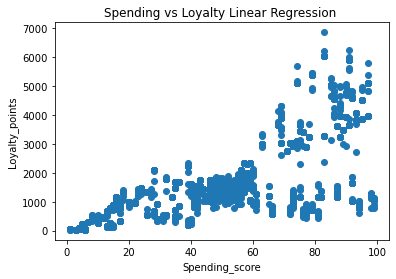

In [24]:
x = reviews_clean['spending_score']
y = reviews_clean['loyalty_points']

# Plot for linearity 
plt.scatter(x,y)
plt.title("Spending vs Loyalty Linear Regression ")
plt.xlabel("Spending_score")
plt.ylabel("Loyalty_points")

In [25]:
# OLS model and summary.
a = 'y ~ x'
test = ols(a, data=reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:18:29   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [27]:
# Set the X coefficient and the constant to generate the regression table.
# Here we can explore how the change in x affects the y dw
y_pred = -75.0527 + 33.0617 * x
# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

## Testing for heteroscedacity 
- After plotting the model I was concenrned the model was presenting heteroscedacity 
- if the p-vaue is greater than 0.05 then we assume homoscesasiticity and we reject the Ho
- in this case the p-value is 1,9 which is much grater than 0,5
- Hence, we assume there is heteroscedacity 

Next, I will try to transform the data using least squares and by sqauring the depedant variable.


In [28]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907726, 'F-test p-value': 2.3037887924501407e-166}


Text(0, 0.5, 'Loyalty_points')

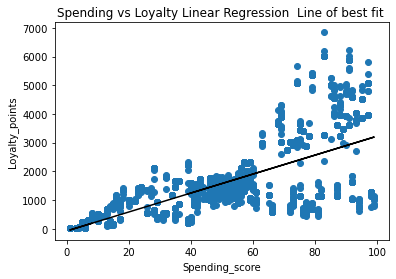

In [29]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x, y)

# Plot the line
plt.plot(x, y_pred, color='black')
plt.title("Spending vs Loyalty Linear Regression  Line of best fit ")
plt.xlabel("Spending_score")
plt.ylabel("Loyalty_points")

## Analysis of descpritive  statitics 
- R-squared of 0.452 = 45% shows there is little correaltion between depedandant and indepedant variable 
- Even when proving thre is heteroscesasiticuty and have have rejectes the null hpythoesis. 
- it was important to undrstand the correaltion between the variables 
- Kurtosis: the number displayed is 4.5 shows a high number for kirtusis of >3
- Demostrating the distribtion of the data is not noramally distributed 
- in this case kurtosis shows excess kurtosis 

## Data distribution exploration  tersting for normality assumption
- Here I will be exploring some of the data distribution using some histograms
- I will be doing this in order to meet some of the assumption in linear repressgion  such as the normal distribution of the data. 
- I was trying to undertand why the r-squared is only of 0.452. I thought it might have come from the distribution of the data.
- Bellow I plotted histograms to undertand both y and x. We can see the indepedant variable  speanding  score, is well distributed even when it shows some peaks that could explain customers spending patterns 
- For the predicator varaible the loyalty points. We can see the distirbtion is quite high towards the left showing the points are concentranted towards the 0- 2000. 

Text(0.5, 1.0, 'Spending Distribution ')

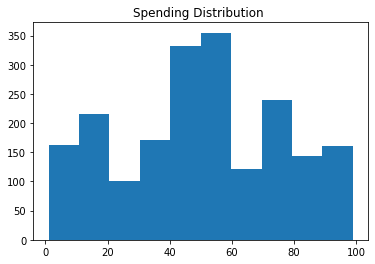

In [30]:
# Spending score distirbution 
# Independant variable s
plt.hist(x)
plt.title("Spending Distribution ")


Text(0.5, 1.0, 'Loyalty Distribution ')

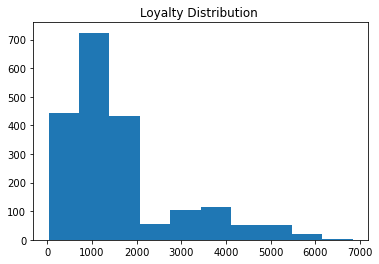

In [31]:
# Loyalty Points distirbution
# Dependant varible spending score 

plt.hist(y)
plt.title("Loyalty Distribution ")

###  Depdant variable checking for distribution 
- Here we can explore the dependant variable shows distribution towards the left 
- There is a high number of records on the left from 0 - 200 compared to 4000 - 7000
- From this we can infere the highest spnding score is from 0 - 20000

## Experimentation with  LR  in order to change heteroscedasticity 
- Here i will be undertaking transformation to try and imprive the model 
1. I have undertaken the tranforamtion of the depedant variable by doing square root
2. And have undertaken th logarithmic function to explore how the dsitribution of the data changes 
3. Lastly, I have used a histogram to explore how the distirbution of the data changes

##  Square root transformation 

In [32]:
#Square root 
square_root_test = np.sqrt(y)

In [33]:
# Square root transformation model OLS
square_root_transformatiion= ' x ~ square_root_test '
test = ols(a, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:18:31   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Square Root transformation ')

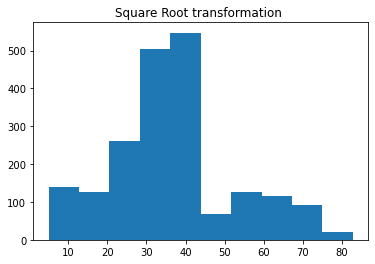

In [34]:
plt.hist(square_root_test)
plt.title( "Square Root transformation ")


## Log transformation 

In [35]:
log_trasnform = np.log(y)

Text(0.5, 1.0, 'Logarthmic Transformation ')

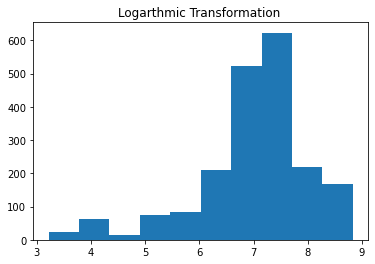

In [72]:
plt.hist(log_trasnform)
plt.title("Logarthmic Transformation ")

In [37]:
# Square root transformation model OLS
log_transformation = ' x ~ log_trasnform '
test = ols(a, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:18:32   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformtion through MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
np.array(y)

array([ 210,  524,   40, ..., 5614, 1048,  479], dtype=int64)

In [40]:
scaler = MinMaxScaler()

In [41]:
normalized_data_y = scaler.fit_transform(np.array(y).reshape(-1,1))

Text(0.5, 1.0, 'MinMaxscaler transformation ')

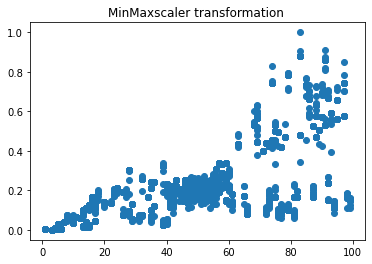

In [42]:
plt.scatter(x, normalized_data_y)
plt.title("MinMaxscaler transformation ")

In [43]:
a = ' x ~ normalized_data_y '
MinMaxScaler = ols(a, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:18:33   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion from various model of transformation 
- After completing three different model transforming LR model interestingly we get the same R-squares test 
- Even after three different models with the dependant  variable being transformed the correaltion between the two variables is still the same 
- Showing change on varible affects 45% the other varible not much 

##  Conclusion Linear Regression assumption and bias 
1. Normality assmption - This data is not well distributed in terms of the data 
2.  Homoscedasiticity - there is no  homoscedasiticity present 
3. Linearity - there is linearity present 

## Model outliers and anomalities 
- We have test there is heteroscedasticity which decreases the validity of the model 
- It is important, to highlight this might be due to the dsirribution being too different or too populated on one side whhich causes the line of best fit not be as accurate towards 60- 100.
- the line of best fits better from 0-60 which could pose problems is this model was to ne used to predict cusotomer sales pattersn


##  Extra resources on LN 
- When underakig this regression model I was quite concerned over the disttibution of the data and the validity of the data. Upon furhter research I learnt that we do not need normally distributed variables. 
- Before undertaking this research I attempted to transform and normalise the data to follow the normality assumption.
- But after using MiMax scaler, square roots and logarithmic one. I notice the effect was very little or it caused over fitting of the model which does not serve for linar regression.
- 
Please refere to: Franco, G. (2020) 'Linear regression: should dependent and independent variables be distributed normally?' Acessed on: https://www.statsimprove.com/en/linear-regression-should-dependent-and-independent-variables-be-distributed-normally/

## Assumption Linear Regression trail 2 with model 2 

 - Here I am tryig to prove another model of regression to see if the value changes 
 - However, the model shows the same number for the R-squared and others

In [44]:
x = reviews_clean['spending_score'].values
y = reviews_clean['loyalty_points'].values

# Plot for linearity 
#plt.scatter(x,y)

In [45]:
x = sm.add_constant(x, prepend=True)
modelo = sm.OLS(endog=y, exog=x,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:18:35   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.0527     45.931     -1.634      0.1

### 5b) renumeration vs loyalty

Text(0, 0.5, 'Loyalty points')

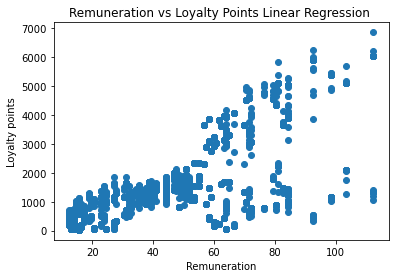

In [46]:
x1 = reviews_clean['remuneration']
y1 = reviews_clean['loyalty_points']

# Plot for linearity 
plt.scatter(x1,y1)
plt.title("Remuneration vs Loyalty Points Linear Regression ")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty points")

In [47]:
# OLS model and summary.
b = 'y1 ~ x1'
test1 = ols(b, data = reviews_clean).fit()


# View the output.
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        23:18:35   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x1            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test1.resid, test1.model.exog)

# Print the results of the Breusch-Pagan test.

terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219334, 'F-test p-value': 3.68e-320}


### Testing for heteroscedacity
After plotting the model I was concenrned the model was presenting heteroscedacity
if the p-vaue is greater than 0.05 then we assume homoscesasiticity and we reject the Ho
in this case the p-value is 7,1 which is much grater than 0,5
Hence, we assume there is heteroscedacity
Next, I will try to transform the data using least squares and by sqauring the depedant variable.

## Analysis of descpritive  statitics 
- R-squared of 0.380 = 38% shows there is little correaltion between depedandant and indepedant variable 
- Even when proving there is heteroscesasiticuty and have have rejectes the null hpythoesis, it was important to undrstand the correaltion between the variables 
- Kurtosis: the number displayed is 3.5 shows a high number for kirtusis of >3
- Demostrating the distribtion of the data is not noramally distributed 
- in this case kurtosis shows excess kurtosis 

In [49]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept   -65.686513
x1           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x1            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [50]:
# Create the linear equation.
y_pred_1 = -65.6865 + 34.1878 * x1

# View the output.
y_pred_1

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

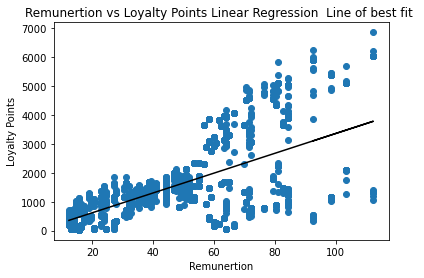

In [51]:
# Plot the data points.
plt.scatter(x1, y1)

# Plot the line
plt.plot(x1, y_pred_1, color='black')
plt.title("Remunertion vs Loyalty Points Linear Regression  Line of best fit ")
plt.xlabel("Remunertion")
plt.ylabel("Loyalty Points")


In [52]:
square_root_test_1 = np.sqrt(y1)

In [53]:
square_root_transformatiion= ' x1 ~ square_root_test_1 '
test = ols(b, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        23:18:37   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x1            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion  model of transformation 
- After completing the model transforming LR model interestingly we get the same R-squares test 
- After the models with the dependant  variable being transformed the correaltion between the two variables is still the same 
- Showing change on varible affects 38% the other varible not much 

##  Conclusion Linear Regression assumption and bias 
1. Normality assmption - This data is not well distributed in terms of the data 
2. Homoscedasiticity - there is no  homoscedasiticity present 
3. Linearity - there is linearity present 

## Model outliers and anomalities
We have test there is heteroscedasticity which decreases the validity of the model
It is important, to highlight this might be due to the dsirribution being too different or too populated on one side whhich causes the line of best fit not be as accurate towards 60- 100.
the line of best fits better from 0-60 which could pose problems is this model was to ne used to predict cusotomer sales pattersn

##  Extra resources on LN 
- Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized datase

Please refere to: Andy (2020) 'Logarithmic Transformation in Linear Regression Models' Acessed on: https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

### 5c) age vs loyalty

Text(0, 0.5, 'Loyalty points')

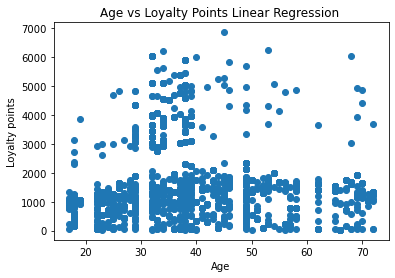

In [54]:
x2 = reviews_clean['age']
y2 = reviews_clean['loyalty_points']

# Plot for linearity 
plt.scatter(x2,y2)
plt.title("Age vs Loyalty Points Linear Regression ")
plt.xlabel("Age")
plt.ylabel("Loyalty points")


In [55]:
b = 'y2 ~ x2'
test2 = ols(b, data = reviews_clean).fit()

# View the output.
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 26 Dec 2022   Prob (F-statistic):             0.0577
Time:                        23:18:38   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x2            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## In this case I will not test for hereroscedacity  since the correalation is so little

## Analysis of descpritive  statitics 
- R-squared of 0.002  shows there is little correaltion between depedandant and indepedant variable 
- Kurtosis: the number displayed is 4.7 shows a high number for kirtusis of >3
- Demostrating the distribtion of the data is not noramally distributed 
- in this case kurtosis shows excess kurtosis 

In [56]:
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())  

Parameters:  Intercept    1736.517739
x2             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x2            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [57]:
# Create the linear equation.
y_pred_2 = 1736.5177 + -4.0128* x2

# View the output.
y_pred_2

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty points')

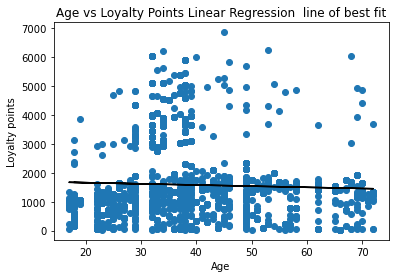

In [58]:
# # Plot the data points.
plt.scatter(x2, y2)

# Plot the line
plt.plot(x2, y_pred_2, color='black')
plt.title("Age vs Loyalty Points Linear Regression  line of best fit")
plt.xlabel("Age")
plt.ylabel("Loyalty points")


##  In this case I will not undertake transformations a the model shows not linearity

##  Conclusion Linear Regression assumption and bias 
1. Normality assmption - This data is not well distributed 
2. Homoscedasiticity - there is no  homoscedasiticity present 
3. Linearity - there is no linearity present 

## Extra Multiple Linear Regression 
- Here I will be testing how differet variables affect the dependant varible 

In [59]:
# Here I am creating the variables. With two indepedant variable
x3 = reviews_clean[['remuneration', 'spending_score']]
y3 = reviews_clean['loyalty_points']

In [60]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(x3, y3)

LinearRegression()

In [61]:
# Here I am perdicing the x array 
multi.predict(x3)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [62]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(x3, y3))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x3, multi.coef_))

R-squared:  0.826913470198926
Intercept:  -1700.305097014437
Coefficients:


[('remuneration', 33.97949882180283), ('spending_score', 32.89269468782099)]

### Interpretation indepedant variable 
- this coefficientes represent sensitivity of the depedant variable to unit changes in the indepedant varible 
1. Remineration --> 33.9 --> this value represnts one unit increse remunaration value 
2. Spending score --> 32.8 --> this value represnts one unit  increase in spending score value 


These are vary similar coeeficeints reflecting a change on  one behaves similarly to a change on the other. 

## Prediciting change on the y- value 
Note 
1. Remuneration scale is 0- 120
2. Spending score is 0 - 7000

In [63]:
# Make predictions of loyalty points (y)
Remuneration = 40
Spending_score  = 5000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [164122.34829496]


In [64]:
# Make predictions of loyalty points (y)
Remuneration = 60
Spending_score  = 5000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [164801.9382714]


In [65]:
# Make predictions of loyalty points (y)
Remuneration = 80
Spending_score  = 5000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [165481.52824783]


In [66]:
# Make predictions of loyalty points (y)
Remuneration = 100
Spending_score  = 5000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [166161.11822427]


## Note:
notice changing remunration points has little impact on the loyalty points even if the spending score is as hihg as 500

In [67]:
# Make predictions of loyalty points (y)
Remuneration = 80
Spending_score  = 3000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [99696.13887219]


In [68]:
# Make predictions of loyalty points (y)
Remuneration = 80
Spending_score  = 4000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [132588.83356001]


In [69]:
# Make predictions of loyalty points (y)
Remuneration = 80
Spending_score  = 6000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [198374.22293566]


In [70]:
# Make predictions of loyalty points (y)
Remuneration = 80
Spending_score  = 7000
print ('Predicted Value: \n', multi.predict([[Remuneration ,Spending_score]]))

Predicted Value: 
 [231266.91762348]


### CONCLUSION FROM PREDICITONS 
- However when we change the spending score the loyalty points are greatly affects so there is a great change on the dependant variable 
- In this way we can infere, higher remuneratio has very little effect on loyalty points 
- And spending score has a high impact on loyalty points - there is a strong correlation between spending score and loyalty points

## Training dataset 

In [71]:
#  train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(x3, y3,
                                                    test_size=0.2,
                                                    random_state=42)

In [414]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:17:50   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3237     39.588    -42.

In [415]:
# Correlatins between variables express as percentage 
print(multi.score(x_train, y_train)*100)

82.9782305142594


## Extra Sources on regerssion models 
### Overfitting and multicoliniarity
- When I was performing the model I was concerned over the risks of overfitting
- Upon further research, I was concerned over overfitting of the moedel becasue the previoys models R-squared were very low compared to this  current model displaying 83%.
- it could be the case the regression coeffcients were represting noise rather than relationships in the data.
- When there ae too many parameters to estimate in one sample. 
- For the rest of the data team, it would be  postive to conduct a predicted r-squared to provide cross validation on the regression model.

Please refer to: Frost, J. (2022) ' Overfitting Regression Models: Problems, Detection, and Avoidance'  Accessed on: https://statisticsbyjim.com/regression/overfitting-regression-models/


In [416]:
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [417]:
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1630.49111009  512.07788432 2146.32624449 ... 1422.83416662 1259.61480693
 1441.17214231]


## Analysis of descpritive  statitics 
- R-squared of 0.82 = 83% shows there high  correaltion between depedandant and indepedant variable 
- Kurtosis: the number displayed is 3.1 shows a high number for kirtusis of >3
- Demostrating the distribtion of the data is not noramally distributed 
- in this case kurtosis shows excess kurtosis
- Number of observatiion is 1600
- The estimated coneffcient of the two indepdant variables is fairly similar
- The Srandar eror is 0.5 for both indepedant varibles
- we are certain the value of loyalty points is between -1777.974  and  -1622.674

## Analysis of VIF Factor 
### Testing for multicollinearity
- High multicolianarity suggest indepedant variblea are lieneary related to each other.
- Multicoloniarity can lessen the satisitcal power of the model complicating the identification of indepedant variable which are statitically significant 
- By checking the VIF factor we can measure the correlation between varibles


In [418]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0         8.9           const
1         1.0    remuneration
2         1.0  spending_score


### Analysis VIF factor 
VIF 1 -5 suggest correlation does not need to be fixed.
-Both VIF factors are of 1
- We can assume that there is no high multicollinearity and hence the correaltion between variables does notbe fixed 


In [419]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 429.66362016909136
Mean Square Error (Final): 300944.09178342705


## Interpretation stats 
MAE --> absolute difference between the actual values and the predicted values
- the closert to 0 the better 
- these value help us a bench mark to be able to compare these model with multipe regression models 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [420]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [421]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv(r'reviews4.csv')

# View DataFrame.
df2.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [422]:
df2.drop('Unnamed: 0', axis=1)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [423]:
# Drop unnecessary columns.
df2_clean = df2.drop(['gender', 'age', 'loyalty_points', 'education',
                     'product', 'review', 'summary', 'Unnamed: 0'], axis=1)


# View DataFrame.

df2_clean

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [424]:
# Explore the data.
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [425]:
# Descriptive statistics.
df2_clean.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


# Here we can explore the different quartiles 
- It appears the quartiles ascend normally I will proceed to plot as boxplot to investigate further

## 2. Plot

##  Plotting for anomalies as a boxplot
- Here I am checking for the distribution and the anomalities of the variables 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff89135160>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff89135730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff89129e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff89135cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff89135fa0>],
 'means': []}

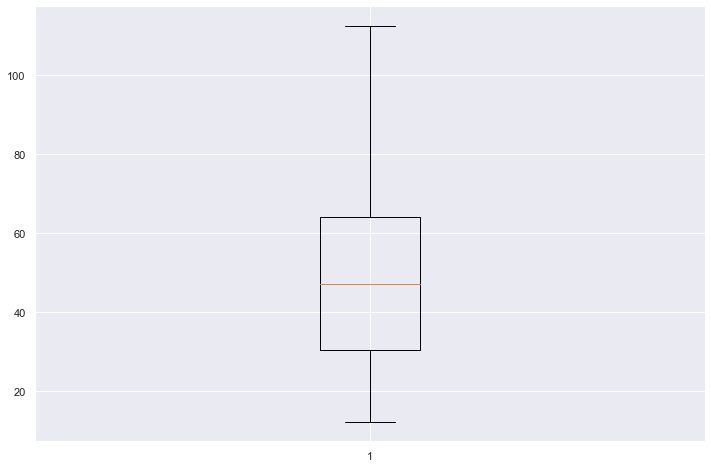

In [426]:
plt.boxplot(df2_clean['remuneration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff89193550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff89193af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff89193280>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff8919e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff8919e3a0>],
 'means': []}

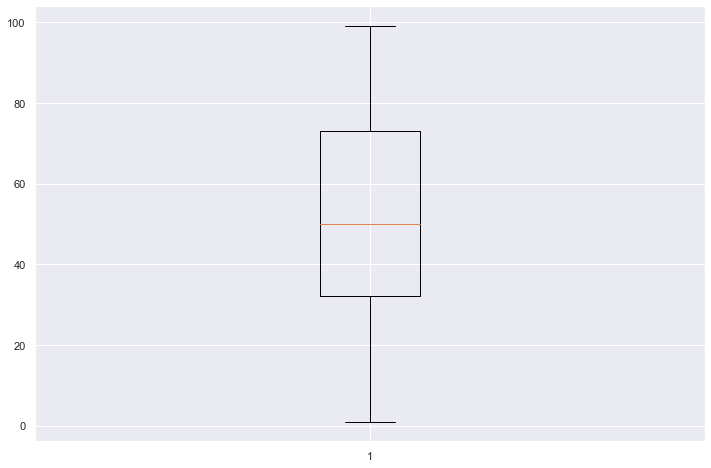

In [427]:
plt.boxplot(df2_clean['spending_score'])

## Obeservation from plot 
- There seem not to be any anomaly on the plots 
- the median is 50 for spending score 
- the median is 50 for remuneration

Text(0.5, 1.0, 'Clusters')

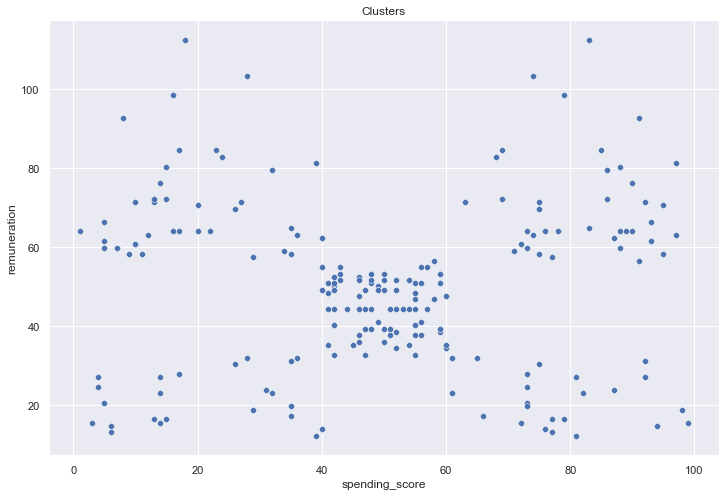

In [428]:
# Create a scatterplot with Seaborn.

sns.scatterplot(x='spending_score',
                y='remuneration',
                data=df2_clean)

plt.title("Clusters")

## Observations
- Here we can see there is a high concetration of points between 40-60
- And we can observe 5 different concetration points 



Text(0.5, 1.0, ' Indepent Variables plot ')

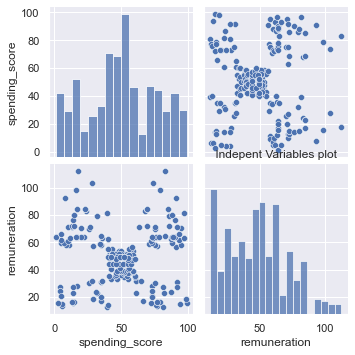

In [429]:
# Create a pairplot with Seaborn.

x = df2_clean[['spending_score', 'remuneration']]

sns.pairplot(df2_clean,
             vars=x)
plt.title(" Indepent Variables plot ")

## 3. Elbow and silhoutte methods

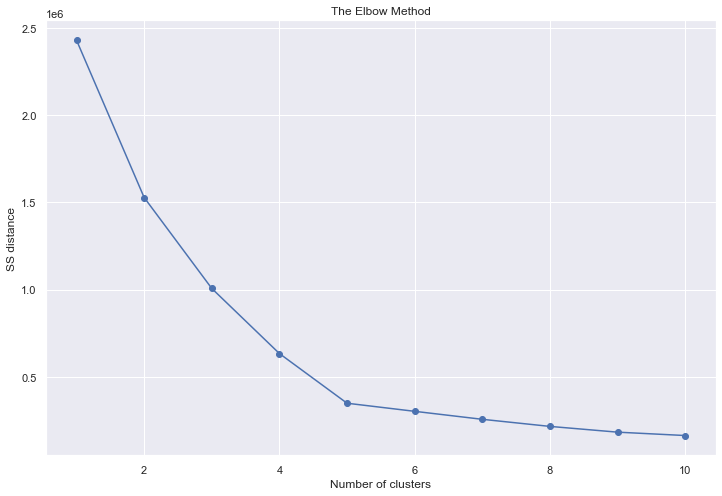

In [430]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

### Observations 
- The elbow method suggests the number of cluster is 5 

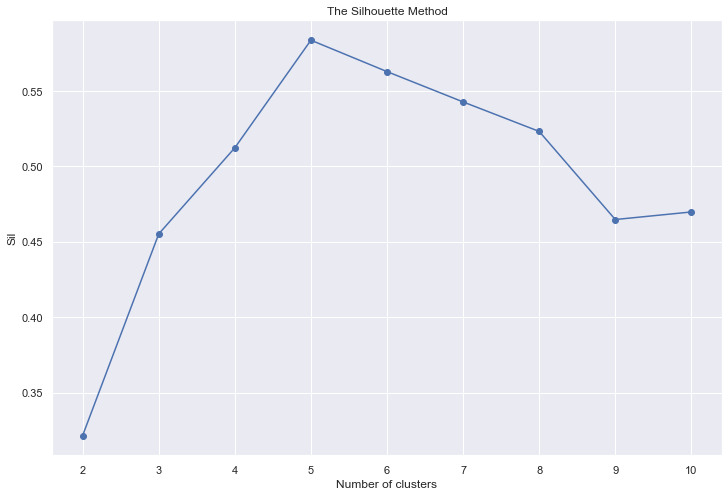

In [431]:
# Determine the number of clusters: Silhouette method.

from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

### Observations 
- The silhouett method suggests the number of cluster is 5 or even poteantitally 8

## 4. Evaluate k-means model at different values of *k*

Text(0.5, 1.0, 'Cluster  Model 5')

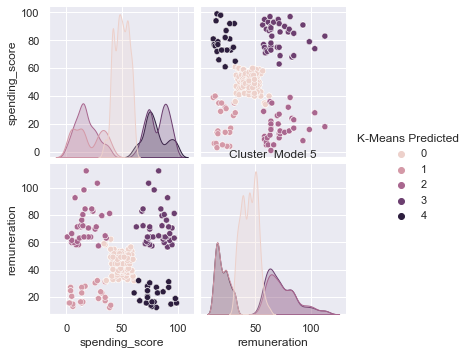

In [469]:
kmeans = KMeans(n_clusters=5,
                max_iter=2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')
plt.title("Cluster  Model 5")

In [437]:
# Here we can see group 0 has the highest values counts compared to te rest of the groups
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [438]:
print(x .head(10))

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  4
2               6         13.12                  1
3              77         13.12                  4
4              40         13.94                  1
5              76         13.94                  4
6               6         14.76                  1
7              94         14.76                  4
8               3         15.58                  1
9              72         15.58                  4


# Graph observations
- the 5 clustes show clear groups well dsitributed

Text(0.5, 1.0, 'Cluster  Model 5 ')

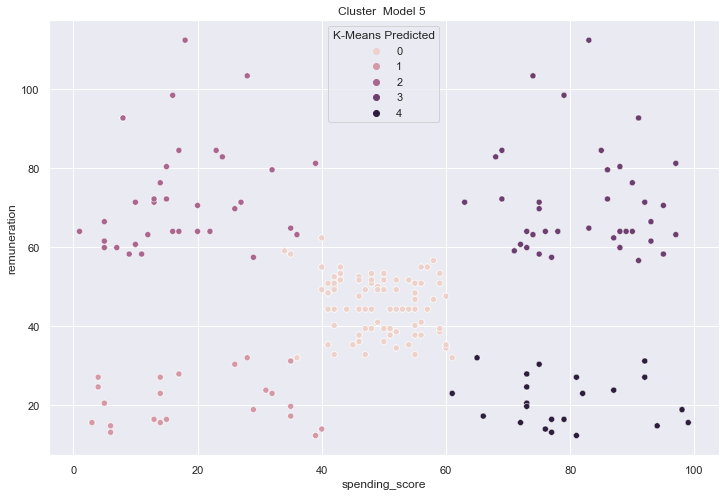

In [439]:
sns.set(rc={'figure.figsize': (12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=x,
                hue='K-Means Predicted')
plt.title("Cluster  Model 5 ")

### Model with 4 clusters, K-4


Text(0.5, 1.0, 'Cluster  Model 4')

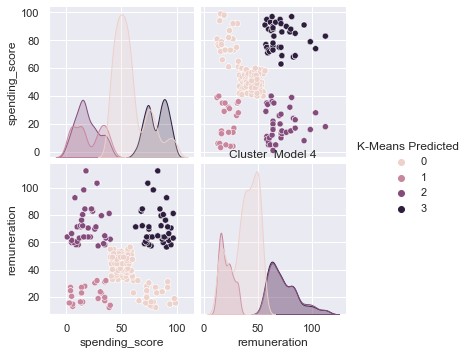

In [440]:
kmeans = KMeans(n_clusters=4,
                max_iter=2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')
plt.title("Cluster  Model 4")

In [441]:
# Here, again cluster 0 shows the higher value counts
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [442]:
print(x.head(10))

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  0
2               6         13.12                  1
3              77         13.12                  0
4              40         13.94                  1
5              76         13.94                  0
6               6         14.76                  1
7              94         14.76                  0
8               3         15.58                  1
9              72         15.58                  0


### Graph observations 
- Here with 4 k show a different distribution of the data  where clsuter 0 semms distrubuted around 2 different areas 

Text(0.5, 1.0, 'Cluster  Model 4 ')

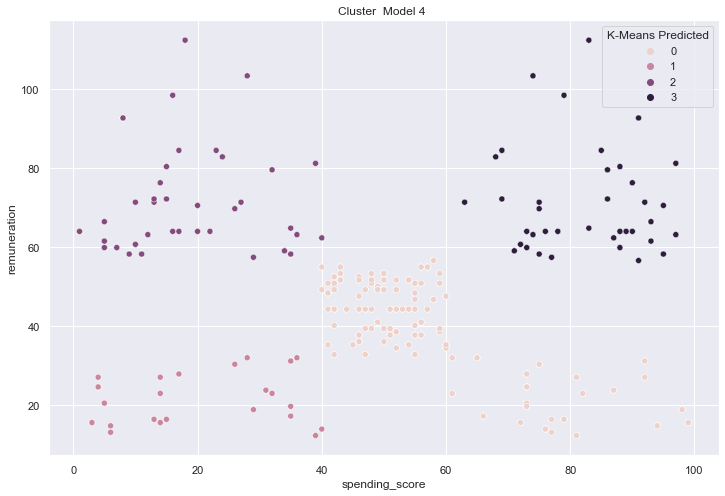

In [443]:
sns.set(rc={'figure.figsize': (12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=x,
                hue='K-Means Predicted')
plt.title("Cluster  Model 4 ")

## K = 3


Text(0.5, 1.0, 'Cluster  Model 3 ')

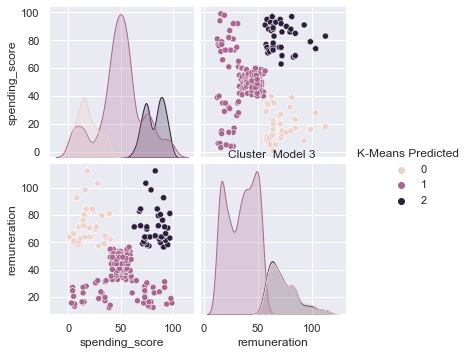

In [444]:
kmeans = KMeans(n_clusters=3,
                max_iter=2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')
plt.title("Cluster  Model 3 ")

In [445]:
# Here there is a slight change, here cluster 1 shows the highest count
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

In [446]:
print(x.head(10))

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  1
2               6         13.12                  1
3              77         13.12                  1
4              40         13.94                  1
5              76         13.94                  1
6               6         14.76                  1
7              94         14.76                  1
8               3         15.58                  1
9              72         15.58                  1


## Graph Observations 
- Here I am concerned ober the distribtion of cluster 1 and how the data ranges from 0 -100. This might suggest the cluster is not classying precisely. 

Text(0.5, 1.0, 'Cluster  Model 3')

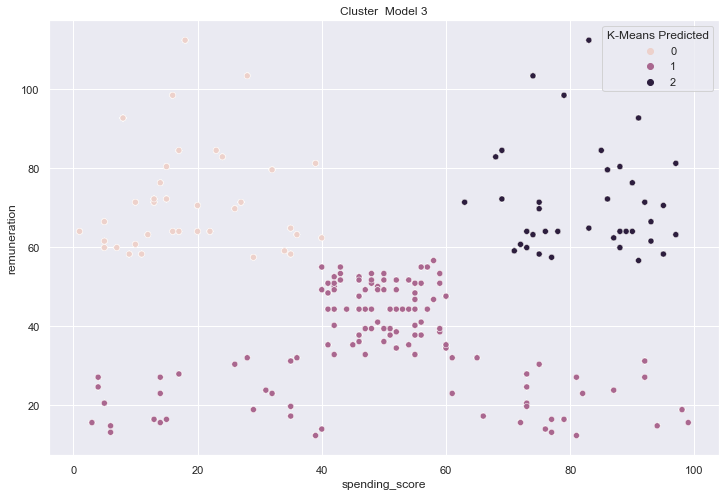

In [447]:
sns.set(rc={'figure.figsize': (12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=x,
                hue='K-Means Predicted')
plt.title("Cluster  Model 3")

## K = 8
- Here I decided on 8 clusters, based on the silohuette method second peak.

Text(0.5, 1.0, 'Cluster  Model 8 ')

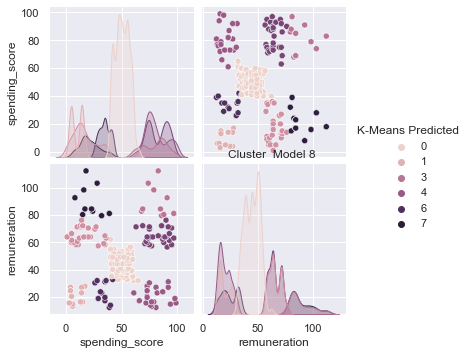

In [448]:
kmeans = KMeans(n_clusters=8,
                max_iter=2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')
plt.title("Cluster  Model 8 ")

In [449]:
# Here again cluster 0 still shows the highest value counts
x['K-Means Predicted'].value_counts()

0    741
4    259
5    238
2    221
1    154
6    146
7    123
3    118
Name: K-Means Predicted, dtype: int64

In [450]:
print(x.head(10))

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  6
1              81         12.30                  4
2               6         13.12                  1
3              77         13.12                  4
4              40         13.94                  6
5              76         13.94                  4
6               6         14.76                  1
7              94         14.76                  4
8               3         15.58                  1
9              72         15.58                  4


## 5. Fit final model and justify your choice
- After exploring various models and the number of clusters as well as the numbr of recoords per cluster. I have decided to use 5 as the final model.
- Moreover, my decision was taken from the distribution of the graph and the proximity of the clusters 
- Lastly, the number of clusters for both elbow and silohutte method recommeded 5 clusters

Text(0.5, 1.0, 'Cluster Final Model 5 ')

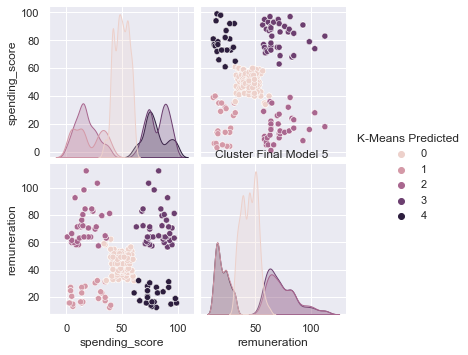

In [451]:
kmeans = KMeans(n_clusters=5,
                max_iter=2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')
plt.title("Cluster Final Model 5 ")

In [452]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## Note:
- it seems like the cluster with the higest number is cluster is group 0. Even when the number of K varies from 5 to 0.

In [453]:
print(x .head(10))

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  4
2               6         13.12                  1
3              77         13.12                  4
4              40         13.94                  1
5              76         13.94                  4
6               6         14.76                  1
7              94         14.76                  4
8               3         15.58                  1
9              72         15.58                  4


Text(0.5, 1.0, 'Cluster Final Model 5 ')

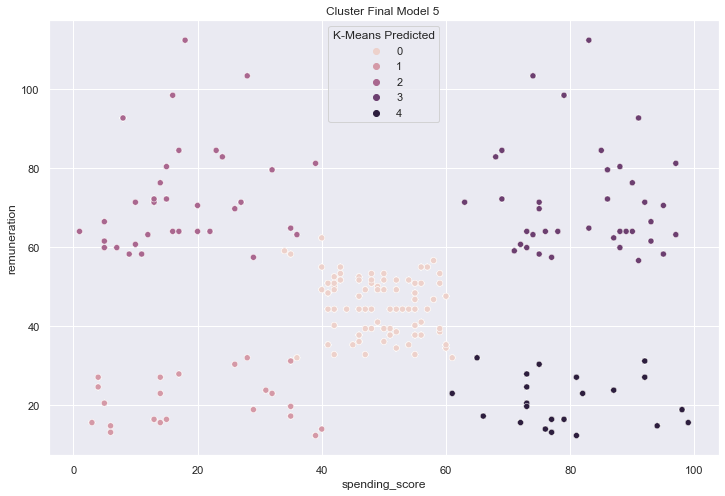

In [454]:
# Visualising the clusters.

# View the DataFrame.
sns.set(rc={'figure.figsize': (12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=x,
                hue='K-Means Predicted')
plt.title("Cluster Final Model 5 ")

### Further analysis of chosen model 

In [460]:
# Here I am creating an array to predict the number of clusters per record
labelpredict = kmeans.predict(x)

labelpredict

array([1, 4, 1, ..., 3, 2, 2])

In [461]:
# By creating a crosstab of clsuters I can predict and make sure the prediciton of clusters is correct
pd.crosstab(clusters, labelpredict)

col_0,0,1,2,3,4
row_0,,,,,
0,774,0,0,0,0
1,0,271,0,0,0
2,0,0,330,0,0
3,0,0,0,356,0
4,0,0,0,0,269


In [462]:
# Here I have created a new column called cluster to explore how the groups are being classfied
# I have done this with the purpose of segmeting customers as per the business objetives
df2['clusters'] = kmeans.labels_

In [463]:
# For example, here we can explore each row and its respective cluster
df2.head(40)

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,clusters
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,4
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,4
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,1
5,5,Female,24,13.94,76,573,PhD,977,Grandson loves,Five Stars,4
6,6,Female,37,14.76,6,61,diploma,979,"I have bought many gm screens over the years, ...",Best gm screen ever,1
7,7,Female,25,14.76,94,772,graduate,1012,Came in perfect condition.,Five Stars,4
8,8,Male,66,15.58,3,31,PhD,1031,Could be better but its still great. I love th...,Great but could be even better,1
9,9,Female,32,15.58,72,724,PhD,1459,My review will mirror others in that this kind...,Another missed opportunity. Not a value add t...,4


### Creating mean per indepedent variable to create costumers segments 
- This findings will be used for the final report and presentation to create customer segments
- For example based on our chosen model we know the average custoemer spending score for clsuter 0 is 49.5 
- And theat thee are more females than males on clsuter 0 
- Morevoer we can infer the average age of the customers from clsuter 0,1,2 is from 40-43

In [464]:
df2.groupby(['clusters'])['spending_score'].mean()

clusters
0    49.529716
1    19.763838
2    17.424242
3    82.008427
4    79.416357
Name: spending_score, dtype: float64

In [465]:
df2.groupby(['clusters','gender']).size()

clusters  gender
0         Female    446
          Male      328
1         Female    170
          Male      101
2         Female    157
          Male      173
3         Female    196
          Male      160
4         Female    151
          Male      118
dtype: int64

In [466]:
df2.groupby(['clusters'])['remuneration'].mean()

clusters
0    44.418786
1    20.424354
2    74.831212
3    73.240281
4    20.353680
Name: remuneration, dtype: float64

In [467]:
df2.groupby(['clusters'])['age'].mean()

clusters
0    42.129199
1    43.505535
2    40.666667
3    35.592697
4    31.602230
Name: age, dtype: float64

In [468]:
df2.groupby(['clusters'])['loyalty_points'].mean()

clusters
0    1420.382429
1     275.059041
2     911.760606
3    3988.238764
4     971.944238
Name: loyalty_points, dtype: float64

## 7. Discuss: Insights and observations
- After creaating the mean for each indepedant variable I can use this to create customer segments which can be used to inform the marketing team so the team can create campaigns for specific groups with unique and shared characteritics 

# Extra resources on chossing K cluster
This resource sregthen my knowledge on choosing the right number of K based on the elbow and siloutte method.

Please refer to: Or Herman-Saffar (2021)'An Approach for Choosing Number of Clusters for K-Means' Accessed on: https://towardsdatascience.com/an-approach-for-choosing-number-of-clusters-for-k-means-c28e614ecb2c

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [138]:
# Import all the necessary packages.
import warnings
from collections import Counter
import pandas as pd
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))

# Import Counter.

warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [139]:
# Load the data set as df3.
df2 = pd.read_csv(r'reviews4.csv')

# View DataFrame.
df2.head()

# View DataFrame.

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [140]:
# Keep necessary columns. Drop unnecessary columns.

df3 = df2.drop(['gender', 'age', 'remuneration', 'spending_score',
               'loyalty_points', 'education', 'product', 'Unnamed: 0'], axis=1)

# View DataFrame.
df3

# View DataFrame.

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [141]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [142]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [143]:
# Review: Change all to lower case and join with a space.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [144]:
# Summary: Change all to lower case and join with a space.
data = df3.fillna('').astype(str).apply(lambda x: x.str.lower())
data.head(30)

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
5,grandson loves,five stars
6,"i have bought many gm screens over the years, ...",best gm screen ever
7,came in perfect condition.,five stars
8,could be better but its still great. i love th...,great but could be even better
9,my review will mirror others in that this kind...,another missed opportunity. not a value add t...


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [145]:
# Replace all the punctuations in review column.
# Replace all the punctuations in summary column.
data['review'] = data['review'].str.replace('[^\w\s]', '')
# Replace all the punctuations in summary  column.
data['summary'] = data['summary'].str.replace('[^\w\s]', '')

# Drop duplicates in both columns.
new_data = data.drop_duplicates(subset=['review', 'summary'], keep='first')
new_data.reset_index(drop=True, inplace=True)
new_data.head(20)

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
5,grandson loves,five stars
6,i have bought many gm screens over the years b...,best gm screen ever
7,came in perfect condition,five stars
8,could be better but its still great i love the...,great but could be even better
9,my review will mirror others in that this kind...,another missed opportunity not a value add to...


In [146]:
new_data.duplicated().sum()

0

## 3. Tokenise and create wordclouds

In [147]:
# Create new DataFrame (copy DataFrame).
data_1 = new_data.copy()
# View DataFrame.

data_1.head(40)

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
5,grandson loves,five stars
6,i have bought many gm screens over the years b...,best gm screen ever
7,came in perfect condition,five stars
8,could be better but its still great i love the...,great but could be even better
9,my review will mirror others in that this kind...,another missed opportunity not a value add to...


In [148]:
data_1.reset_index(inplace=True)
# Here I am reseting the index

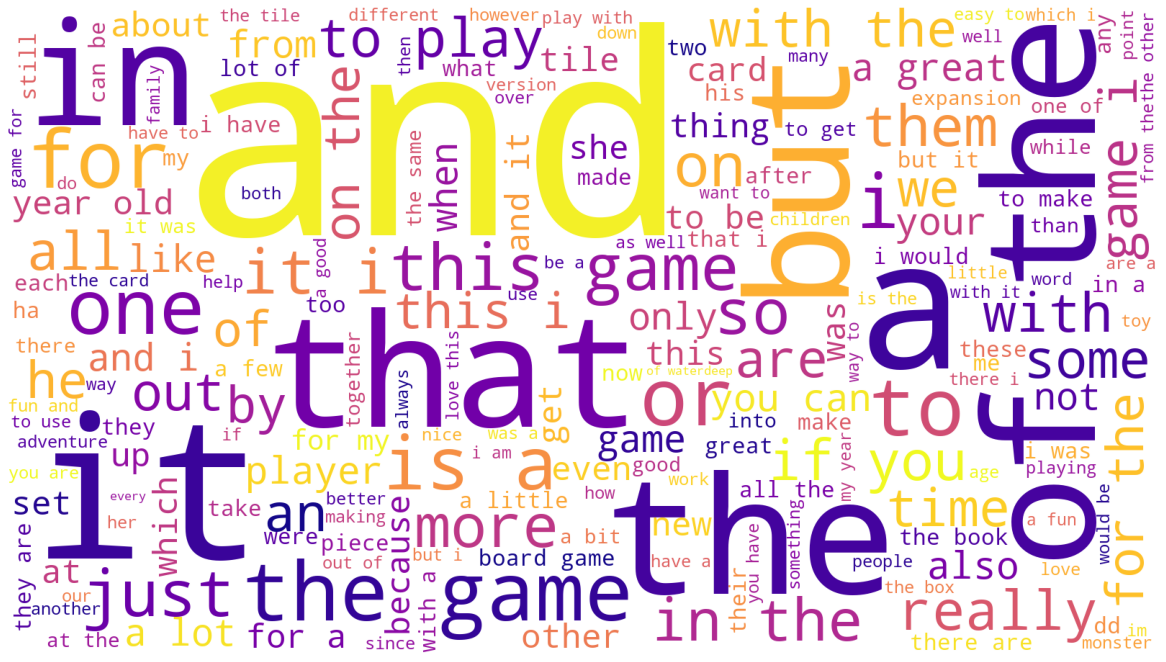

In [149]:
# Here I am creating wordcloud of review
review = ''
for i in range(data_1.shape[0]):
    # Add each comment.
    review = review + data_1['review'][i]

    # Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width=1600, height=900,
                       background_color='white',
                       colormap='plasma',
                       stopwords='none',
                       min_font_size=10).generate(review)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

## Analysis wordcloud review 
- Here we can see the most popular words but we havent cleaned the column so the majority of words are stopwords
- However, we can see 'game' is displayed a few times

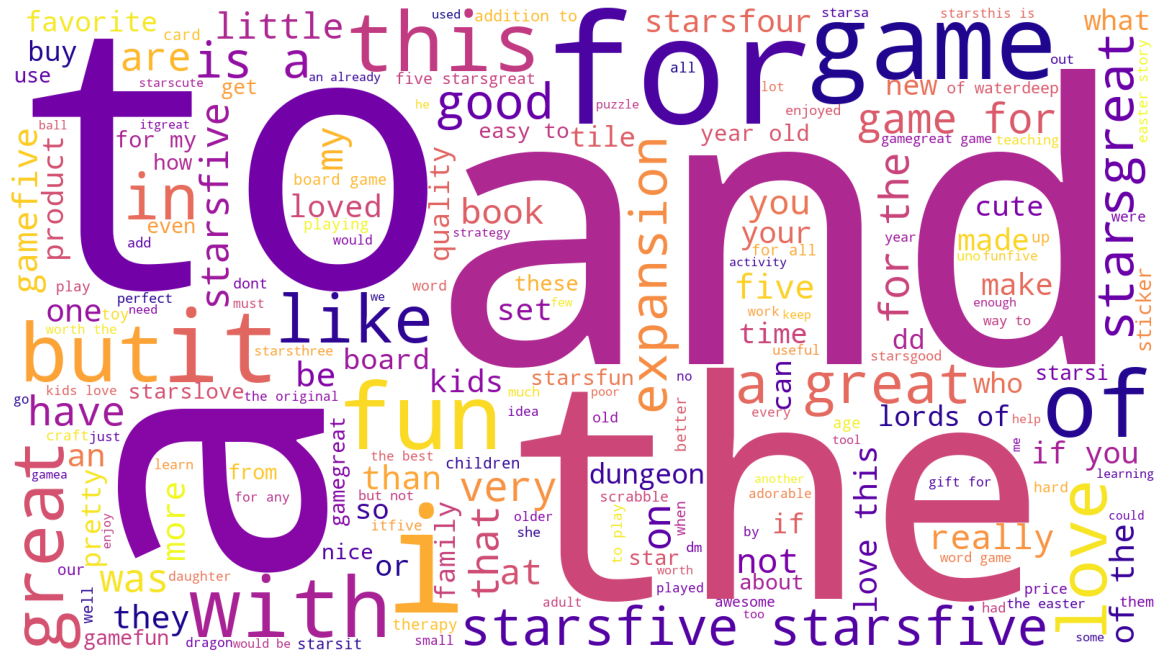

In [150]:
# Here I am creating wordcloud of summary

summary = ''
for i in range(data_1.shape[0]):
    # Add each comment.
    summary = summary + data_1['summary'][i]

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width=1600, height=900,
                       background_color='white',
                       colormap='plasma',
                       stopwords='none',
                       min_font_size=10).generate(summary)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

## Analysis wordcloud summary 
- Here we can see the most popular words but we havent cleaned the column so the majority of words are stopwords
- However, we can see 'game' is displayed a few times

In [151]:
data_1.head(20)

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
5,5,grandson loves,five stars
6,6,i have bought many gm screens over the years b...,best gm screen ever
7,7,came in perfect condition,five stars
8,8,could be better but its still great i love the...,great but could be even better
9,9,my review will mirror others in that this kind...,another missed opportunity not a value add to...


In [152]:
data_1.drop('index', axis=1)

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when...,super fun
1958,great game for all\nkeeps the mind nimble,great game
1959,fun game,four stars


### Cleaning review column for F.D.

In [153]:
# here I am creating a new column called taken_review which is tokenize
data_1['tokens_review'] = data_1['review'].apply(word_tokenize)

# Preview data.
data_1['tokens_review'].head(40)

0     [when, it, comes, to, a, dms, screen, the, spa...
1     [an, open, letter, to, galeforce9, your, unpai...
2     [nice, art, nice, printing, why, two, panels, ...
3     [amazing, buy, bought, it, as, a, gift, for, o...
4     [as, my, review, of, gf9s, previous, screens, ...
5                                     [grandson, loves]
6     [i, have, bought, many, gm, screens, over, the...
7                        [came, in, perfect, condition]
8     [could, be, better, but, its, still, great, i,...
9     [my, review, will, mirror, others, in, that, t...
10                                  [works, very, well]
11                            [cant, wait, to, use, it]
12    [this, is, a, campaign, specific, dm, screen, ...
13    [this, is, one, of, the, worst, games, i, have...
14    [it, sounded, like, a, really, amazing, concep...
15                   [very, fun, game, for, my, family]
16    [pretty, good, book, with, a, variety, of, uni...
17    [when, i, unexpectedly, came, across, a, p

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [154]:
# Define an empty list of tokens.
all_tokens_review = []
for i in range(data_1.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + data_1['tokens_review'][i]

In [155]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
frequency_distribution_review = FreqDist(all_tokens_review)

# Preview data.
frequency_distribution_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [156]:
# Here I am creating a frequency distribution of the most popular words
frequency_distribution_review.most_common(5)

[('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488)]

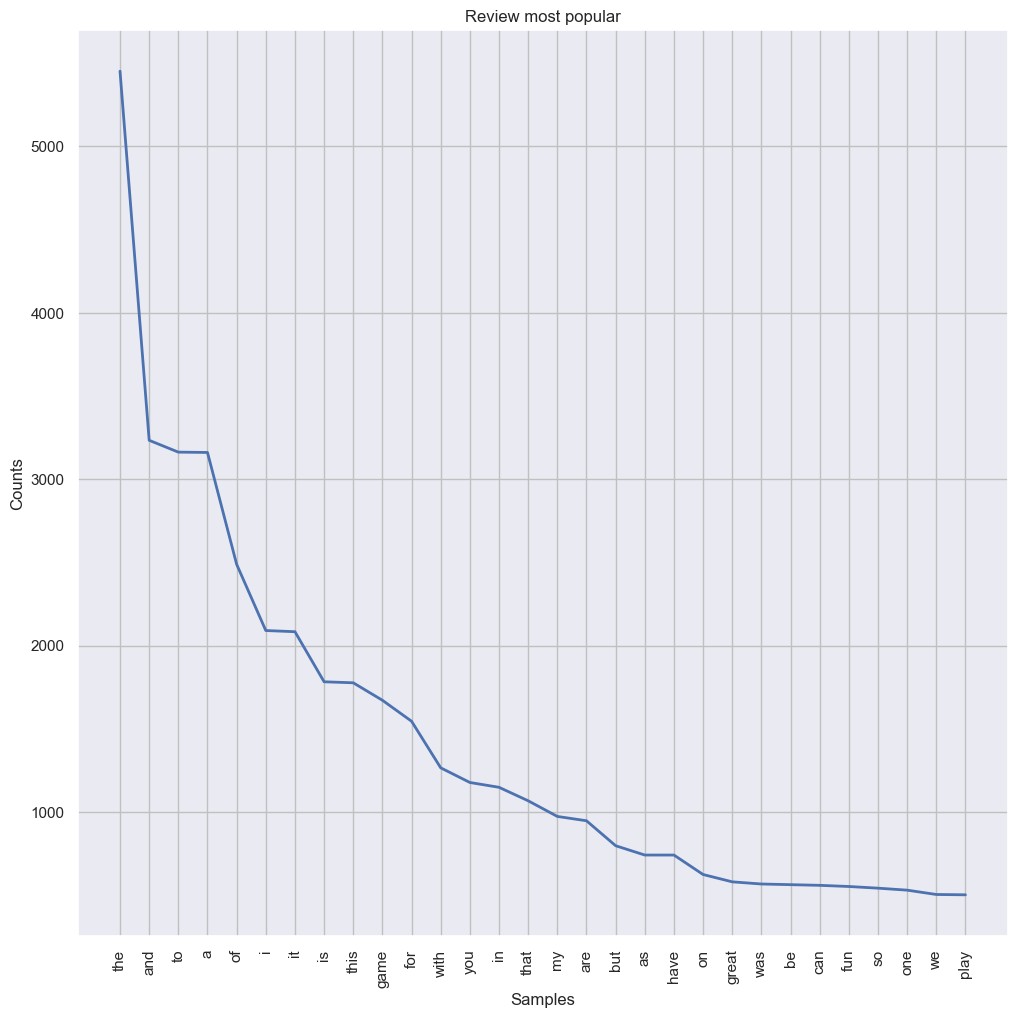

In [157]:
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)
plt.title("Review most popular")

# Plot the data set.
frequency_distribution_review.plot(30, cumulative=False)

# Display the result.
plt.show()

### Observations from graph
- This graph can show us the most populat words and its distirbutons better
- for example we can see game, great, gun and play are some of the most popular ones with a distibution of less than 1000

In [158]:
# Her checking for alpahnumeric charcters
review_token_clean = [word for word in all_tokens_review if word.isalnum()]

In [159]:
# Here I am creating a list of clean words from review
review_token_clean

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [160]:
# By importing the stopwords module,I can clean the the list leaving onlt the neccesary words
from nltk.corpus import stopwords
nltk.download('stopwords')

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
review_clean2 = [x for x in review_token_clean if x.lower()
                 not in english_stopwords]

# Define an empty string variable.
review_clean2_string = ''

for value in review_token_clean:
    # Add each filtered token word to the string.
    review_clean2_string = review_clean2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Wordcloud without stopwords Review 

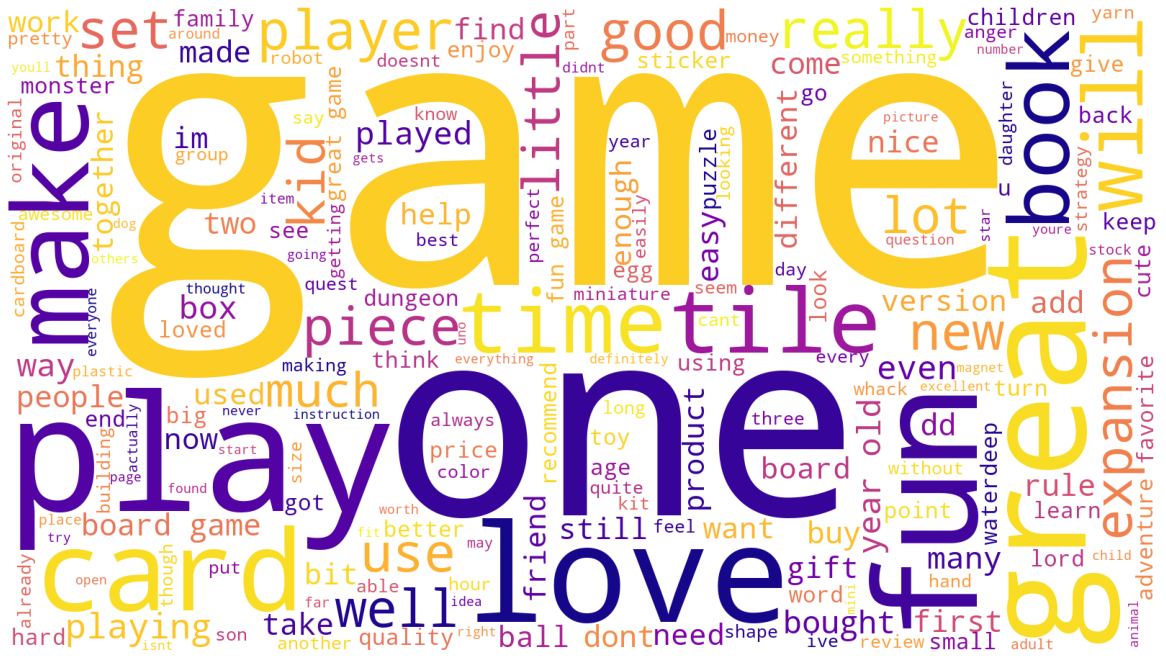

In [161]:
# Create a WordCloud.
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      min_font_size=10).generate(review_clean2_string)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observations from graph
- This graph can show us the most populat words and its distirbutons better as the data is now clean of stopwords
- For example, we can see game, play, fun, love, great - generally these are postive reviews suggesting this columns sentiemnt is postive 

In [162]:
# Determine the 15 most common word from review
fd_review_clean = FreqDist(review_clean2)

# Preview the data.
fd_review_clean

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [163]:
# Here I am creating a dataframe to obseve the most common words for review without stopwords
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(review_clean2).most_common(15),
                             columns=['Word', 'Frequency_review']).set_index('Word')

# Preview data.
counts_review

,Frequency_review
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


### Observatiion from frequency 
- Here again we can see the most popular words 
- THe overall sentiment seem to be postive where game is the highest count followed by great and fun

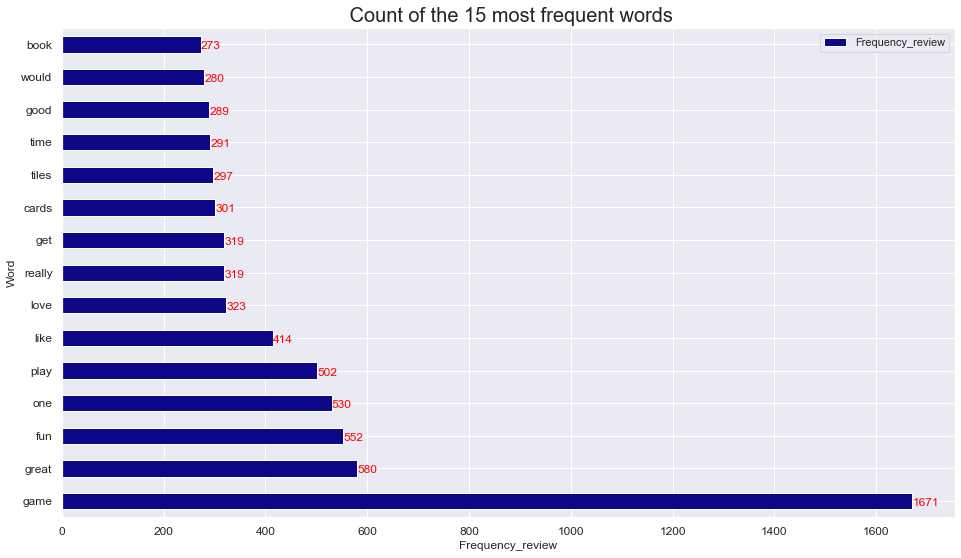

In [164]:
# Here I am creating a plot to observe the most common words and its occurence
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                        colormap='plasma')

# Set the labels.
ax.set_xlabel('Frequency_review', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title(" Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## Observation from graph
- With thi graph we can observe more clearly the frequency of the words
- For example, great, fun and play display aorunf 500 counts compared to game with 1600
- In this way, it is safe to assume the overall sentiment from the review column is postive 

## For summary column

In [165]:
# here I am creating a new column called taken_summary which is tokenize

data_1['tokens_summary'] = data_1['summary'].apply(word_tokenize)

# Preview data.
data_1['tokens_summary'].head(40)

0     [the, fact, that, 50, of, this, space, is, was...
1     [another, worthless, dungeon, masters, screen,...
2                  [pretty, but, also, pretty, useless]
3                                         [five, stars]
4                                         [money, trap]
5                                         [five, stars]
6                              [best, gm, screen, ever]
7                                         [five, stars]
8                 [great, but, could, be, even, better]
9     [another, missed, opportunity, not, a, value, ...
10                                        [five, stars]
11                                     [love, the, map]
12                        [not, a, general, dm, screen]
13                                   [very, weak, game]
14                             [fell, completely, flat]
15                                        [five, stars]
16                                         [good, book]
17                      [buckley, was, a, card, 

In [166]:
# Define an empty list of tokens.
all_tokens_summary = []
for i in range(data_1.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + data_1['tokens_summary'][i]

In [167]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
frequency_distribution_summary = FreqDist(all_tokens_summary)

# Preview data.
frequency_distribution_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [168]:
# Here I am creating a frequency distibution
frequency_distribution_summary.most_common(5)

[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('the', 261)]

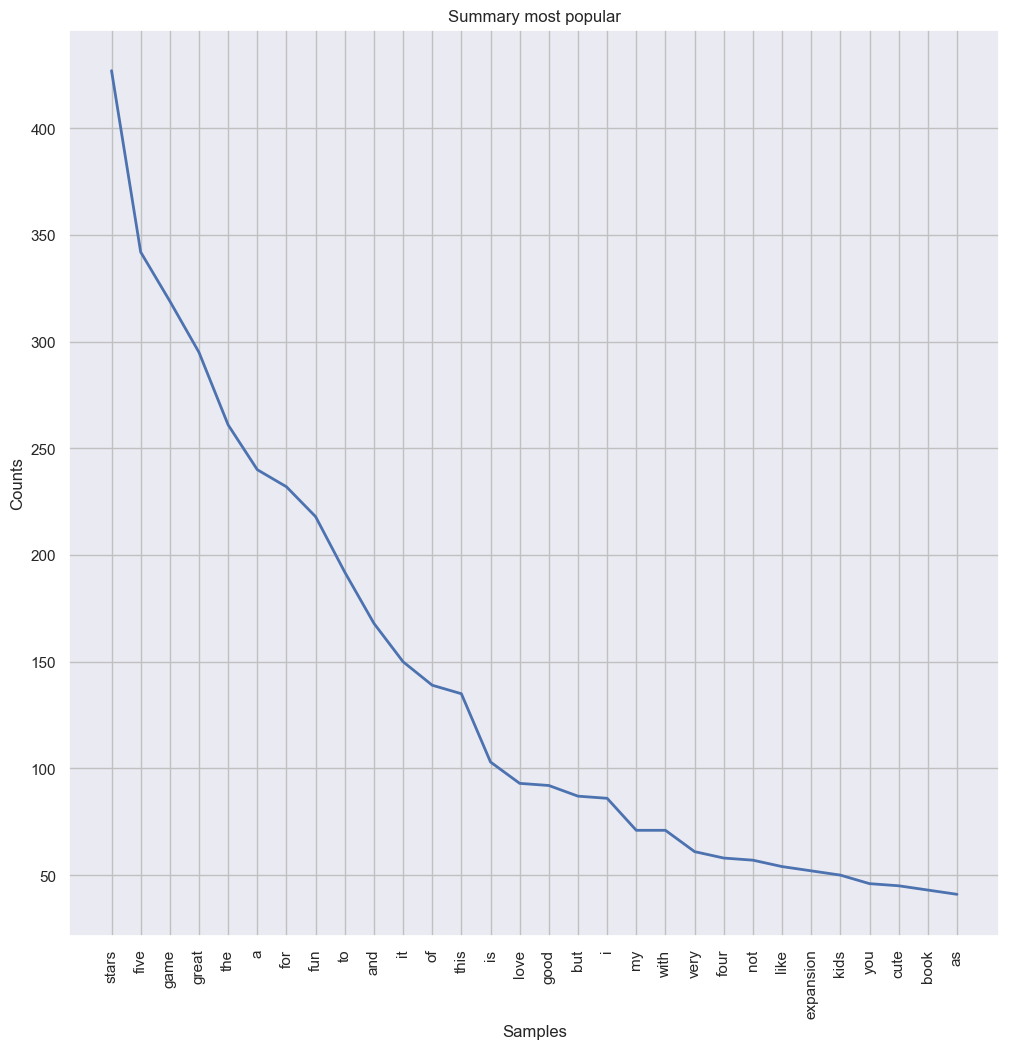

In [170]:
# Here I am creating a plot in order to observe the distibution of the words
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)
plt.title("Summary most popular")


# Plot the data set.
frequency_distribution_summary.plot(30, cumulative=False)

# Display the result.
plt.show()

## Observation from frequency graph 
- Here we can see the most popular word is stars five, suggesting five starts for games is the most popualr phrase 
- Morever the rest of the words are quite postive such as fun, love, good

In [171]:
# Her checking for alpahnumeric charcters
summary_token_clean = [word for word in all_tokens_summary if word.isalnum()]

In [172]:
summary_token_clean

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [173]:
# Here I am cleaning the tokenise words
# Delete all the alpanum.
from nltk.corpus import stopwords
nltk.download('stopwords')

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
summary_clean2 = [x for x in summary_token_clean if x.lower()
                  not in english_stopwords]

# Define an empty string variable.
summary_clean2_string = ''

for value in review_token_clean:
    # Add each filtered token word to the string.
    summary_clean2_string = summary_clean2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


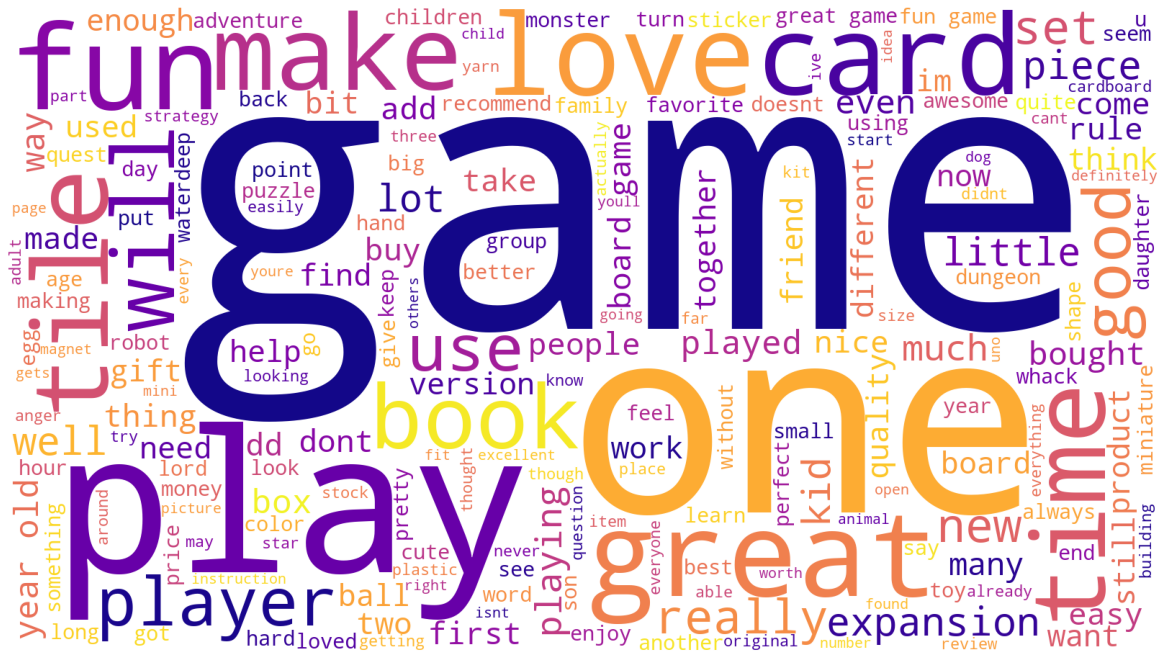

In [174]:
# This is a wordclous of suammry without the stopwords
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      min_font_size=10).generate(summary_clean2_string)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observations from graph
- Once again, we hae the most popoualt word is game, followed by play great, love, fun, and good 
- Demostrating a positive sentiment 

In [175]:
# Determine the 15 most common words.
fd_summary_clean = FreqDist(summary_clean2)

# Preview the data.
fd_summary_clean

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [176]:
# Here I am creating a dataframe with the freequency distribution once it has been cleaned
from collections import Counter

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(summary_clean2).most_common(15),
                              columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


### Observation freuquency table 
- the frequency for the summary column is much lower than the review column 
- Burt again, there is a postive sentiment 
- Some interesting words are expansion which might suggest customers might think they want the store to expand 

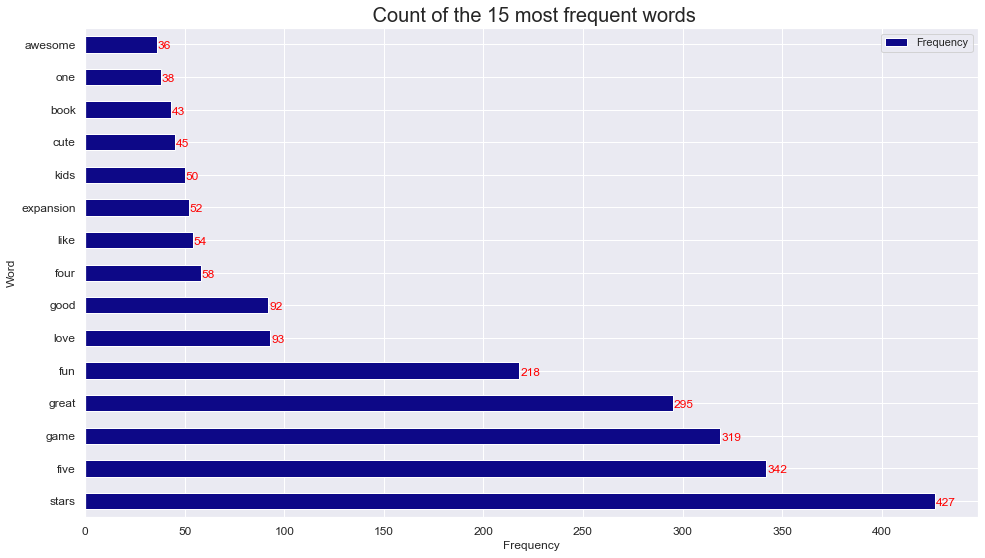

In [177]:
# Here I am plotting the most common words per frequency
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                         colormap='plasma')

# Set the labels.
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title(" Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## Observation from grtaph 
- here again we can explore better the distribution of the table and to explore the count of each word 

In [178]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [179]:
# Here I am importing the vader lexicon in order to perfom sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Natalia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment Analysis for summary

In [180]:
# Here I am tokenising aagain the column summary
df1 = data_1['summary'].values
# Split up each tweet into individual words
df2 = [word_tokenize(_) for _ in df1]

In [181]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
all_english_words = set(words.words())

# View results.
all_english_words

{'uncaptious',
 'pierless',
 'sudamen',
 'colorful',
 'desacralize',
 'overslight',
 'pint',
 'Crambinae',
 'adipescent',
 'homogeneous',
 'obediently',
 'cartographically',
 'rudenture',
 'inobservation',
 'anencephaly',
 'cerebriformly',
 'Jarvis',
 'planorbiform',
 'skintight',
 'uninoculable',
 'achymia',
 'pielum',
 'recognizer',
 'disguise',
 'oxychromatic',
 'supersacral',
 'mailguard',
 'suspicious',
 'gird',
 'Augusti',
 'thujone',
 'praesidium',
 'Vediovis',
 'satisfactorily',
 'convenable',
 'clogginess',
 'mulctary',
 'Aushar',
 'technician',
 'technocratic',
 'mimically',
 'revolutionizement',
 'sensuist',
 'Snowball',
 'forebitt',
 'bioral',
 'bughead',
 'lentibulariaceous',
 'weedable',
 'bicarinate',
 'latericumbent',
 'disparately',
 'Ancistrocladus',
 'pseudomorphine',
 'disgarnish',
 'imperceived',
 'precondensation',
 'onhanger',
 'parody',
 'avulse',
 'procompetition',
 'plagueful',
 'doubleness',
 'Vance',
 'quid',
 'pruh',
 'panesthesia',
 'citadel',
 'Leninism',

In [182]:
# Here I am crating a dataframe with clean tokenised words
df3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha()
        and y.lower() in all_english_words] for x in df2]

In [183]:
# Here I am testing if the dataframe is clean
df3[2]

['pretty', 'also', 'pretty', 'useless']

In [184]:
# Here I am performing sentiment analysis on the dataframe with the clean words
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_): sia.polarity_scores(" ".join(_)) for _ in df3}

### Checking for polarity 

In [185]:
# Convert the list of dictionary results to a Pandas DataFrame.
# We can see some of the highly positive words.
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity.head(20)

,neg,neu,pos,compound
fact space wasted art terribly informative art,0.576,0.424,0.000,-0.7783
another worthless dungeon screen,0.492,0.508,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
best screen ever,0.000,0.323,0.677,0.6369
great could even better,0.000,0.222,0.778,0.7906
another opportunity value add product line,0.000,0.435,0.565,0.6369
love map,0.000,0.192,0.808,0.6369
general screen,0.000,1.000,0.000,0.0000


### Observation  polarity
- Expect for the frist two columns which are quite negatuve the overall negative sentiment is not that negative 
- we can see the scores are more towards positivity than negativity 
- And only some are neutral with 0.0000

### Positive Polarity 

In [203]:
# Get the top 5 most positive cleaned summarizes related to cheesecake
polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fun,0.0,0.0,1.0,0.5106
delight,0.0,0.0,1.0,0.5994
excited,0.0,0.0,1.0,0.3400
happy gift,0.0,0.0,1.0,0.7650
easily,0.0,0.0,1.0,0.3400
love like,0.0,0.0,1.0,0.7717
entertaining,0.0,0.0,1.0,0.4404
gift,0.0,0.0,1.0,0.4404
yeah,0.0,0.0,1.0,0.2960
fun play,0.0,0.0,1.0,0.6908


### Oberservations from postive polarity 
- Overall, the compund  polarity is quite postive displaying high values like 0.8, 0.7 and 0.6 
- And the postive columns is showing 1.0 the highest polarity

### Negative polarity 

In [202]:
polarity.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
disappointed,1.000,0.000,0.000,-0.4767
defective poor,1.000,0.000,0.000,-0.7184
worn,1.000,0.000,0.000,-0.2960
bad,1.000,0.000,0.000,-0.5423
boring,1.000,0.000,0.000,-0.3182
disappointing,1.000,0.000,0.000,-0.4939
fight,1.000,0.000,0.000,-0.3818
angry,1.000,0.000,0.000,-0.5106
sided die,0.796,0.204,0.000,-0.5994
mad dragon,0.762,0.238,0.000,-0.4939


### Observations from negative polarity
- The negative column shows some 1.0 however the rest is not as high desmstrating the negative feeling is not neccesarily that negative 
- The majorty of the  negative compound score is quite low ranging from -0.2 to -0.4 showing is not necessarily so negative 

### Compound descriptive  statistics 

In [188]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.1 so slightly positive
polarity['compound'].describe()

count    1165.000000
mean        0.378276
std         0.343531
min        -0.784500
25%         0.000000
50%         0.493900
75%         0.624900
max         0.952400
Name: compound, dtype: float64

### Observatin from stats
- we can see the man is 0.3 which is still an overall postive sentiment 
- the count is 1165

### COMPOUND SUMMARY GRAPH

<AxesSubplot:>

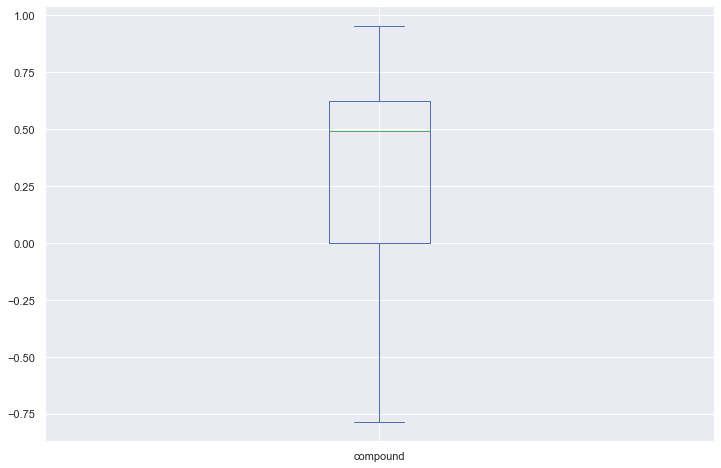

In [189]:
# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

### Observation from compound 
- Here we can the the average counpound for the summary column is 0.5 which shows an overall postive sentiment
- Moroever, we can see there are not clear outliers 
- And we can see the main sentiment is from 0.00 to 1.00 proving is a neutral or positve sentiment 

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

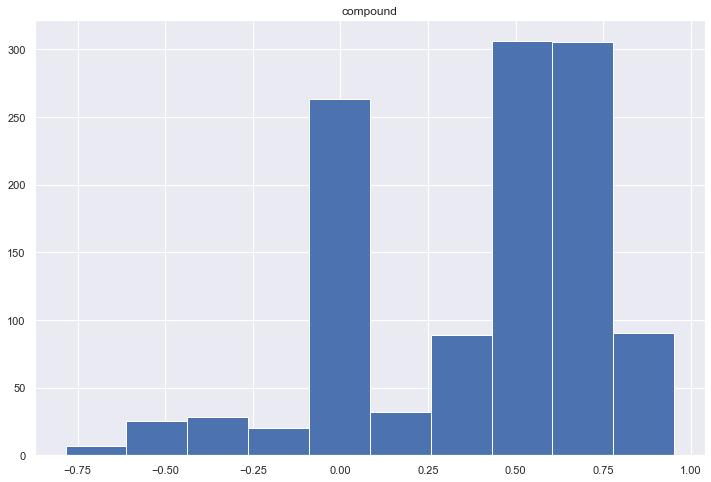

In [173]:
# You can also try to create a histogram:
polarity['compound'].sort_values().reset_index().hist()

### Observatins from graph 
- With this historgam we can explore again the majority of sentiments are either neurtal, or postive towatds 0.50 - 0.75
- With very few negative reviews

## Sentiment Analysis Review 

In [190]:
# Here I am subsetting the column review
df1_review = data_1['review'].values
# Split up each tweet into individual words
df2_1 = [word_tokenize(_) for _ in df1_review]

In [191]:
# Here I am calling for all the english words 
all_english_words = set(words.words())

# View results.
all_english_words

{'uncaptious',
 'pierless',
 'sudamen',
 'colorful',
 'desacralize',
 'overslight',
 'pint',
 'Crambinae',
 'adipescent',
 'homogeneous',
 'obediently',
 'cartographically',
 'rudenture',
 'inobservation',
 'anencephaly',
 'cerebriformly',
 'Jarvis',
 'planorbiform',
 'skintight',
 'uninoculable',
 'achymia',
 'pielum',
 'recognizer',
 'disguise',
 'oxychromatic',
 'supersacral',
 'mailguard',
 'suspicious',
 'gird',
 'Augusti',
 'thujone',
 'praesidium',
 'Vediovis',
 'satisfactorily',
 'convenable',
 'clogginess',
 'mulctary',
 'Aushar',
 'technician',
 'technocratic',
 'mimically',
 'revolutionizement',
 'sensuist',
 'Snowball',
 'forebitt',
 'bioral',
 'bughead',
 'lentibulariaceous',
 'weedable',
 'bicarinate',
 'latericumbent',
 'disparately',
 'Ancistrocladus',
 'pseudomorphine',
 'disgarnish',
 'imperceived',
 'precondensation',
 'onhanger',
 'parody',
 'avulse',
 'procompetition',
 'plagueful',
 'doubleness',
 'Vance',
 'quid',
 'pruh',
 'panesthesia',
 'citadel',
 'Leninism',

In [192]:
# Here i am creating a new dataset and cleaning for tokenization
df4 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha()
        and y.lower() in all_english_words] for x in df2_1]

In [193]:
df4[2]

['nice',
 'art',
 'nice',
 'printing',
 'two',
 'filled',
 'general',
 'forgotten',
 'map',
 'beyond',
 'one',
 'blue',
 'ocean',
 'waste',
 'dont',
 'understand',
 'cant',
 'make',
 'useful',
 'rather',
 'solely',
 'specific',
 'adventure',
 'supposed',
 'able',
 'transpose',
 'adventure',
 'outside',
 'forgotten',
 'even',
 'list',
 'new',
 'would',
 'least',
 'useful',
 'map',
 'even',
 'would',
 'stuff',
 'related',
 'running',
 'game',
 'stuff',
 'related',
 'thing',
 'curse',
 'make',
 'useful',
 'raven',
 'loft',
 'undead',
 'horror',
 'general',
 'instead',
 'huge',
 'amount',
 'screen',
 'space',
 'solely',
 'castle',
 'useful',
 'small',
 'fraction',
 'time',
 'even',
 'curse',
 'adventure',
 'let',
 'alone',
 'various',
 'really',
 'kill',
 'extended',
 'use',
 'thinking',
 'potential',
 'use',
 'adventure',
 'question',
 'well',
 'use',
 'sense',
 'rage',
 'screen',
 'far',
 'useful',
 'broad',
 'dark',
 'covering',
 'lot',
 'various',
 'may',
 'suffer',
 'map',
 'one',
 'p

### Performing Sentiment Analysis 

In [194]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

# Run through a dictionary comprehension to take every cleaned tweet
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_): sia.polarity_scores(" ".join(_)) for _ in df4}

### Checking for polarity

In [204]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words.
polarity_2 = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity_2.head(20)

,neg,neu,pos,compound
comes screen space screen absolute premium fact space wasted art terribly informative art well completely useless reason gave technically speaking least still stand block dice ball completely,0.347,0.596,0.057,-0.8932
open letter unpainted bad spell great board however terrible still waiting single screen polluted pointless useful tables youve single use screen useful running storm thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted bloated overland map could easily reduced single panel size table short stop making crap,0.218,0.494,0.288,0.6908
nice art nice printing two filled general forgotten map beyond one blue ocean waste dont understand cant make useful rather solely specific adventure supposed able transpose adventure outside forgotten even list new would least useful map even would stuff related running game stuff related thing curse make useful raven loft undead horror general instead huge amount screen space solely castle useful small fraction time even curse adventure let alone various really kill extended use thinking potential use adventure question well use sense rage screen far useful broad dark covering lot various may suffer map one panel storm one decent tables really mark maybe ask would use,0.298,0.570,0.132,-0.9756
amazing buy bought gift new perfect,0.000,0.224,0.776,0.8860
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063
grandson,0.000,1.000,0.000,0.0000
bought many one best ever seen relevant information need crap filler happy screen,0.127,0.488,0.385,0.7430
came perfect condition,0.000,0.351,0.649,0.5719
could better still great love side screen actually like map middle easy reference whats around given time,0.000,0.420,0.580,0.9485
review mirror kind mark lost help wouldnt advise new use stick generic screen useful information like information put screen relevant game accessible frequently tables adventure book also like map perspective page pretty useful especially adventure however large amount wasted space could easily instead whole map take screen middle ocean could giant hierarchy giant rune random sea table trap tables number usefully applicable information story would done away sea portion map completely used space efficiently actuality entire map could extra insert freeing far space making product far adventure book could included tear better collaboration product different note printing copy screen sized correctly left right right edge right side almost illegible screen general position gaming attached pic understand idea desire produce adventure dont feel truly taken time get feedback enough printing coming across licensed money grab instead value add product adventure line,0.057,0.650,0.292,0.9891


### Positive polarity

In [196]:
# Get the top 5 most positive cleaned summarizes related to cheesecake
polarity_2.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fantastic,0.0,0.0,1.0,0.5574
fun enjoyable,0.0,0.0,1.0,0.7351
love,0.0,0.0,1.0,0.6369
easy,0.0,0.0,1.0,0.4404
perfect,0.0,0.0,1.0,0.5719
gift,0.0,0.0,1.0,0.4404
cute,0.0,0.0,1.0,0.4588
fun entertaining,0.0,0.0,1.0,0.7351
super fun,0.0,0.0,1.0,0.8020
awesome gift,0.0,0.0,1.0,0.7906


### Observation from postive polarity 
- the postive column is all 1 showig overall is very postive 
- Moreover , the compound score is quite hihg ranging from 0.8 to 0.3

### Negative polarity 

In [197]:
# Get the top 5 most positive cleaned summarizes related to cheesecake
polarity_2.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
doesnt love great fun,0.904,0.096,0.000,-0.8542
found difficult,0.714,0.286,0.000,-0.3612
cardboard ghost original hard believe shame disgusting,0.703,0.138,0.159,-0.7845
incomplete kit disappointing,0.615,0.385,0.000,-0.4939
anger way discuss anger repetitive start get half round,0.610,0.390,0.000,-0.8555
never get old great toy great delivery,0.569,0.431,0.000,-0.7641
rather hard year old alone,0.531,0.469,0.000,-0.3400
cant wait use love,0.529,0.471,0.000,-0.5216
fun way talk anger identify feel angry,0.490,0.280,0.231,-0.5719


## Observations from negative 
- the negative polarity is not so negative as the column are not all 1.0 but some of the, are neutral even postive 
- the compound score is which is negative generally display a low negativity of 0.1 - 0.3 with some that are higher

### Compound for review 

In [182]:
# The describe function on the compound will show the distribution and moments.
# The average is 0.1 so slightly positive
polarity_2['compound'].describe()

count    1893.000000
mean        0.614441
std         0.378991
min        -0.975600
25%         0.458800
50%         0.742200
75%         0.891000
max         0.998700
Name: compound, dtype: float64

## Observatiion form compound 
- For this coloumn the mean is higher showing a score of 0.6 
- and the count is higher og 1893

### Visualizing Compound for review 

<AxesSubplot:>

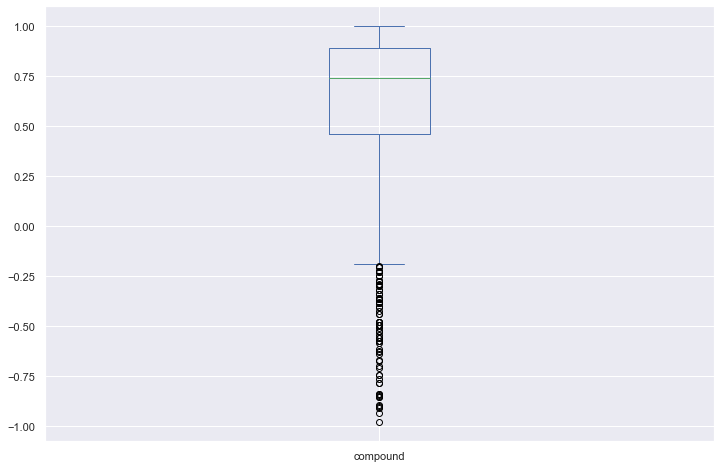

In [183]:
# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity_2.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

# Observations from graph boxplot 
- This plot shoes the overall sentiment is quite high 
- Where the majority of the sentiment is from 0.50 to 0.80
- then, there are a lot of negative anamalies which suggest some negative revire are quite extreme

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

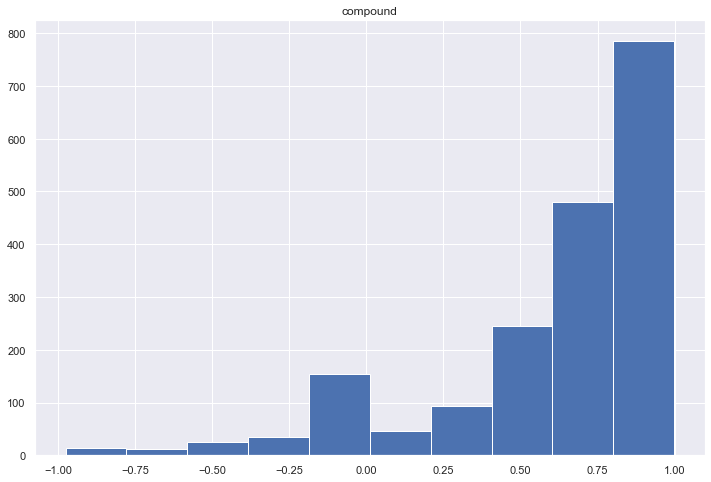

In [184]:
# You can also try to create a histogram:
polarity_2['compound'].sort_values().reset_index().hist()

### Observation from histogram
- the majority of the sentiment are neutral and more towards a positive sentiment
- From 0.25 - 1.00

### Extra sources on Sentiment Analysis 
"VADER produces a compound score that summarizes the sentiment intensity of the input text. It is computed by summing the valence scores of each feature in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). The documentation describes the compound score as the “normalized, weighted composite score”. Furthermore, the pos, neg, neu scores represent the ratios for proportions of text that fall in each category (ex. Rule-Based enhancements)."


Please refer to: Lee, K (2021) 'Sentiment Analysis — Comparing 3 Common Approaches: Naive Bayes, LSTM, and VADER'
Acessed on: https://towardsdatascience.com/sentiment-analysis-comparing-3-common-approaches-naive-bayes-lstm-and-vader-ab561f834f89
    